Qutip


Rabi Oscillations

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def build_jc_hamiltonian(N, w_c, w_a, g):

    a = tensor(destroy(N), qeye(2))
    
    sz = tensor(qeye(N), sigmaz())  
    sm = tensor(qeye(N), sigmam()) 

    a_dag = a.dag()
    sp = sm.dag()  
    
    H_cavity = w_c * a_dag * a
    H_atom   = (w_a * 0.5) * sz
    H_int    = g * (a_dag * sm + a * sp) 
    H = H_cavity + H_atom + H_int
    
    return H
wc = 0.0 * 2 * np.pi  # Cavity frequency (angular frequency)
wa = 0.0 * 2 * np.pi  # Atom frequency (Resonant: wa = wc)
g  = 0.05  # Coupling strength (how fast they exchange energy)
N  = 15   

H_sys = build_jc_hamiltonian(N, wc, wa, g)

print("Hamiltonian constructed successfully:")
H_sys

Hamiltonian constructed successfully:


Quantum object: dims=[[15, 2], [15, 2]], shape=(30, 30), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.         0.         0.         0.05       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.07071068
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

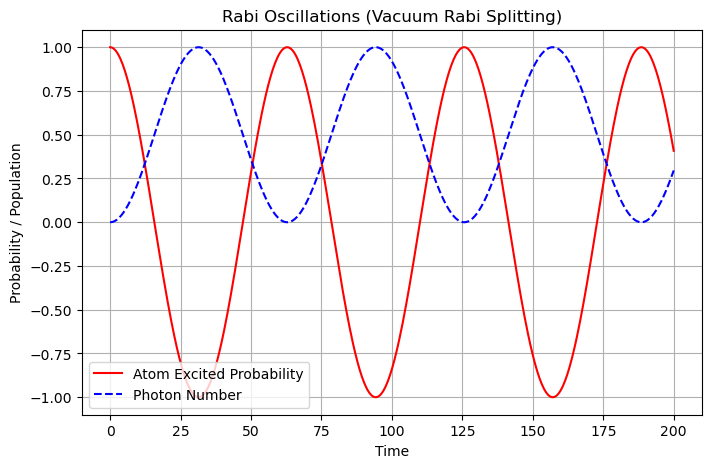

In [8]:
a = tensor(destroy(N), qeye(2))
a_dag = a.dag()
sz = tensor(qeye(N), sigmaz())
sm = tensor(qeye(N), sigmam())
s = sm.dag()
psi0 = tensor(basis(N, 0), basis(2, 0))


tlist = np.linspace(0, 200, 500)

# Number of photons in cavity: a.dag * a
n_op = tensor(num(N), qeye(2))

# We can measure sigma_z or the projection onto the excited state
atom_exc_op = tensor(qeye(N), basis(2,0)*basis(2,0).dag())

output = mesolve(H_sys, psi0, tlist, [], [a_dag * a, sz])

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(tlist, output.expect[1], label="Atom Excited Probability", color="r")

ax.plot(tlist, output.expect[0], label="Photon Number", color="b", linestyle="--")

ax.set_xlabel('Time')
ax.set_ylabel('Probability / Population')
ax.set_title('Rabi Oscillations (Vacuum Rabi Splitting)')
ax.legend()
ax.grid(True)

plt.show()